<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a> (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h2> <font color="blue"> Solutions for </font>Reflections</h2>

<a id="task1"></a>
<h3> Task 1</h3>

Create a quantum ciruit with 5 qubits.

Apply h-gate (Hadamard operator) to each qubit.

Apply z-gate ($Z$ operator) to randomly picked qubits. (i.e., $ mycircuit.z(qreg[i]) $)

Apply h-gate to each qubit.

Measure each qubit.

Execute your program 1000 times.

Compare the outcomes of the qubits affected by z-gates, and the outcomes of the qubits not affected by z-gates.

Does z-gate change the outcome?

Why?

<h3> Solution </h3>

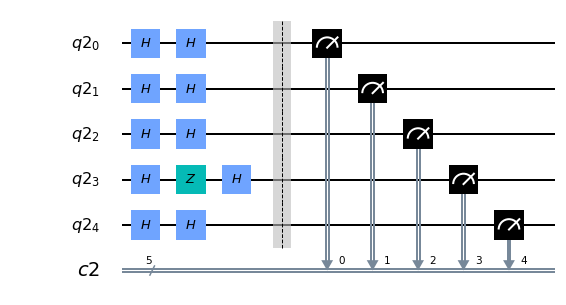

In [7]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# import randrange for random choices
from random import randrange

number_of_qubit = 5

# define a quantum register with 5 qubits
q =  QuantumRegister(number_of_qubit)

# define a classical register with 5 bits
c = ClassicalRegister(number_of_qubit)

# define our quantum circuit
qc = QuantumCircuit(q,c)

# apply h-gate to all qubits
for i in range(number_of_qubit):
    qc.h(q[i])

# apply z-gate to randomly picked qubits
for i in range(number_of_qubit):
    if randrange(2) == 0: # the qubit with index i is picked to apply z-gate
        qc.z(q[i])
        
# apply h-gate to all qubits
for i in range(number_of_qubit):
    qc.h(q[i])
    
qc.barrier()
    
# measure all qubits
qc.measure(q,c)

# draw the circuit
qc.draw(output='mpl')

In [8]:
# execute the circuit 1000 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)

{'01000': 1000}


<a id="task2"></a>
<h3> Task 2 </h3>

Randomly create a quantum state and multiply it with Hadamard matrix to find its reflection.

Draw both states.

Repeat the task for a few times.

<h3>Solution</h3>

A function for randomly creating a 2-dimensional quantum state:

In [5]:
# randomly create a 2-dimensional quantum state
from math import cos, sin, pi
from random import randrange
def random_quantum_state2():
    angle_degree = randrange(360)
    angle_radian = 2*pi*angle_degree/360
    return [cos(angle_radian),sin(angle_radian)]

-0.529919264233205 -0.848048096156426
-0.9743700647852351 0.22495105434386486


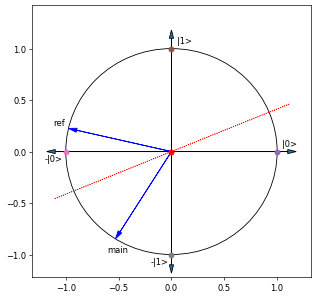

In [6]:
%run qlatvia.py

draw_qubit()

# line of reflection for Hadamard
from matplotlib.pyplot import arrow
arrow(-1.109,-0.459,2.218,0.918,linestyle='dotted',color='red')

[x1,y1] = random_quantum_state2()

print(x1,y1)

sqrttwo=2**0.5
oversqrttwo = 1/sqrttwo

[x2,y2] = [ oversqrttwo*x1 + oversqrttwo*y1 , oversqrttwo*x1 - oversqrttwo*y1 ]

print(x2,y2)

draw_quantum_state(x1,y1,"main")

draw_quantum_state(x2,y2,"ref")

<a id="task3"></a>
<h3> Task 3 </h3>

Find the matrix representing the reflection over the line $y=x$.

_Hint: Think about the reflections of the points $ \myrvector{0 \\ 1} $, $ \myrvector{-1 \\ 0} $, and $ \myrvector{-\sqrttwo \\ \sqrttwo} $ over the line $y=x$._

Randomly create a quantum state and multiply it with this matrix to find its reflection over the line $y = x$.

Draw both states.

Repeat the task for a few times.

<h3>Solution</h3>

The reflection over the line $y=x$ swaps the first and second amplitudes.

This is the operetor NOT: $ X = \mymatrix{rr}{0 & 1 \\ 1 & 0} $.

A function for randomly creating a 2-dimensional quantum state:

In [ ]:
# randomly create a 2-dimensional quantum state
from math import cos, sin, pi
from random import randrange
def random_quantum_state2():
    angle_degree = randrange(360)
    angle_radian = 2*pi*angle_degree/360
    return [cos(angle_radian),sin(angle_radian)]

Reflecting the randomly picked quantum state over the line $y=x$. 

In [ ]:
%run qlatvia.py

draw_qubit()

# the line y=x
from matplotlib.pyplot import arrow
arrow(-1,-1,2,2,linestyle='dotted',color='red')

[x1,y1] = random_quantum_state2()

[x2,y2] = [y1,x1]

draw_quantum_state(x1,y1,"main")
draw_quantum_state(x2,y2,"ref")